In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
observations = 100000 #contains the size of the dataset we want to generate

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,size=(observations,1)) 

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,size=(observations,1)) 

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro1', inputs=generated_inputs, targets=generated_targets)

In [3]:
training_data = np.load('TF_intro1.npz')

In [4]:
input_size = 2 # x's and z's
output_size = 1

In [5]:
model = tf.keras.Sequential([tf.keras.layers.Dense(output_size,
                                                  kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                   )
                            ])

In [11]:
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) 

model.compile(optimizer=custom_optimizer, loss='huber_loss')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
3125/3125 - 4s - loss: 0.6660 - 4s/epoch - 1ms/step
Epoch 2/100
3125/3125 - 3s - loss: 0.6694 - 3s/epoch - 1ms/step
Epoch 3/100
3125/3125 - 3s - loss: 0.6835 - 3s/epoch - 1ms/step
Epoch 4/100
3125/3125 - 3s - loss: 0.6719 - 3s/epoch - 1ms/step
Epoch 5/100
3125/3125 - 4s - loss: 0.6757 - 4s/epoch - 1ms/step
Epoch 6/100
3125/3125 - 4s - loss: 0.6826 - 4s/epoch - 1ms/step
Epoch 7/100
3125/3125 - 3s - loss: 0.6813 - 3s/epoch - 1ms/step
Epoch 8/100
3125/3125 - 4s - loss: 0.6728 - 4s/epoch - 1ms/step
Epoch 9/100
3125/3125 - 4s - loss: 0.6712 - 4s/epoch - 1ms/step
Epoch 10/100
3125/3125 - 4s - loss: 0.6722 - 4s/epoch - 1ms/step
Epoch 11/100
3125/3125 - 3s - loss: 0.6669 - 3s/epoch - 1ms/step
Epoch 12/100
3125/3125 - 4s - loss: 0.6731 - 4s/epoch - 1ms/step
Epoch 13/100
3125/3125 - 3s - loss: 0.6767 - 3s/epoch - 1ms/step
Epoch 14/100
3125/3125 - 4s - loss: 0.6687 - 4s/epoch - 1ms/step
Epoch 15/100
3125/3125 - 4s - loss: 0.6704 - 4s/epoch - 1ms/step
Epoch 16/100
3125/3125 - 5s - loss

### Change the loss function. An alternative loss for regressions is the Huber loss. The Huber loss is more appropriate than the L2-norm when we have outliers, as it is less sensitive to them (in our example we don't have outliers, but you will surely stumble upon a dataset with outliers in the future). The L2-norm loss puts all differences *to the square*, so outliers have a lot of influence on the outcome. The proper syntax of the Huber loss is 'huber_loss'

In [9]:
model.layers[0].get_weights()

[array([[ 2.003655],
        [-2.997463]], dtype=float32),
 array([5.003409], dtype=float32)]

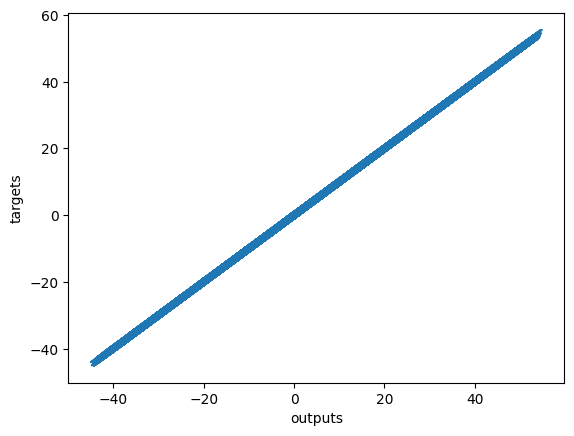

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

 0.001 => 0.1666 (Huber)
 0.1 => 0.6762 (Huber)